In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
import numpy as np
import pickle as pkl
import cv2
from Dataloader import Dataloader
from src.Vision import Vision
from src.DepthTracker import DepthTracker
from tqdm import tqdm
%load_ext autoreload
%autoreload 2


In [14]:
dl = Dataloader('/home/nic/ms-work/dtplayground/bear_front')
bbox,_ = dl.getBbox(0)
# static camera
T = np.array([0,0,0])
R = np.eye(3)

dt = DepthTracker(dl.K)
deltaT = 1/30.0
print(dl.numOfFrames)

295


In [23]:
bestP = []
gtP = []
error=0
lastIdx = 0
for i in tqdm(range(dl.bboxes.shape[0])):
    scanFrame = False
    if i==0:
        scanFrame = True
        xyz = dl.getXYZ(i)
    # if i < 120:
    #     xyz = dl.getXYZ(i)
    else:
        xyz = np.empty((480,640,3))
        xyz[:,:,:] = np.nan
    img = dl.getRGB(i)
    bbox,_ = dl.getBbox(i)
    bestParticle,idx = dt.updateMeasurements(img,xyz,bbox,T,R,deltaT,scanFrame)

    if bestParticle is not None:
        gt_xyz = dl.getXYZ(i)
        lastIdx = idx
        u,v = dt.vision.getBBoxCenter(bbox[0])
        gt_origin = gt_xyz[u,v,:]
        bestP.append(bestParticle)
        gtP.append(gt_origin)
        error += np.linalg.norm(bestParticle[:3]-gt_origin)
    # else:
    #     bestP.append(dt.particleFilter.particles[lastIdx])

100%|██████████| 281/281 [00:14<00:00, 19.25it/s]


0.010345180866993554


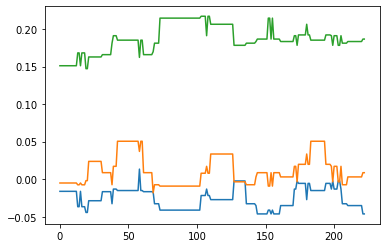

In [24]:
print(error/280)
bestP = np.array(bestP)
plt.plot(bestP[:,:3])

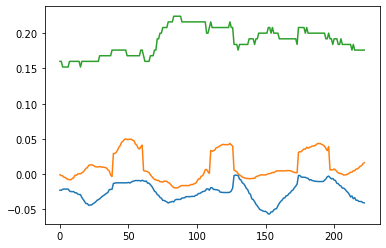

In [28]:
gtP = np.array(gtP)
plt.plot(gtP)#-bestP[:,:3])